In [1]:
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
ticker = "SPY"

t = yf.Ticker(ticker)

In [3]:
start = datetime(2021, 1, 1)
end = datetime(2025, 6, 1)

factor = 3

In [29]:
df = yf.download(ticker, start, end)

/tmp/ipykernel_8284/99250952.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2021-01-04,345.273956,351.509282,341.557104,351.378195,110210800
2021-01-05,347.652008,348.747415,344.581159,344.627988,66426200
2021-01-06,349.730499,352.941806,345.582986,346.135361,107997700
2021-01-07,354.926544,355.675520,351.939954,352.117840,68766800
2021-01-08,356.948914,357.164229,353.054173,356.321624,71677200


In [30]:
df["returns"] = df["Close"].pct_change()

In [31]:
df.head()

Price,Close,High,Low,Open,Volume,returns
Ticker,SPY,SPY,SPY,SPY,SPY,
Date,,,,,,
2021-01-04,345.273956,351.509282,341.557104,351.378195,110210800,NaN
2021-01-05,347.652008,348.747415,344.581159,344.627988,66426200,0.006887
2021-01-06,349.730499,352.941806,345.582986,346.135361,107997700,0.005979
2021-01-07,354.926544,355.675520,351.939954,352.117840,68766800,0.014857
2021-01-08,356.948914,357.164229,353.054173,356.321624,71677200,0.005698


In [8]:
import numpy as np

In [32]:
df["log_letf_factor"] = np.log(1 + df["returns"] * factor)

In [33]:
df["log_ordinary_factor"] = np.log(1 + df["returns"])
df.drop(columns=["log_ordinary_factor"])

Price,Close,High,Low,Open,Volume,returns,log_letf_factor
Ticker,SPY,SPY,SPY,SPY,SPY,,
Date,,,,,,,
2021-01-04,345.273956,351.509282,341.557104,351.378195,110210800,NaN,NaN
2021-01-05,347.652008,348.747415,344.581159,344.627988,66426200,0.006887,0.020452
2021-01-06,349.730499,352.941806,345.582986,346.135361,107997700,0.005979,0.017777
2021-01-07,354.926544,355.675520,351.939954,352.117840,68766800,0.014857,0.043607
2021-01-08,356.948914,357.164229,353.054173,356.321624,71677200,0.005698,0.016950
...,...,...,...,...,...,...,...
2025-05-23,575.806641,578.491251,572.316653,572.694490,76029000,-0.006826,-0.020690
2025-05-27,587.778015,587.937076,575.130540,582.726975,72588500,0.020791,0.060504


In [34]:
df.head()

Price,Close,High,Low,Open,Volume,returns,log_letf_factor,log_ordinary_factor
Ticker,SPY,SPY,SPY,SPY,SPY,,,
Date,,,,,,,,
2021-01-04,345.273956,351.509282,341.557104,351.378195,110210800,NaN,NaN,NaN
2021-01-05,347.652008,348.747415,344.581159,344.627988,66426200,0.006887,0.020452,0.006864
2021-01-06,349.730499,352.941806,345.582986,346.135361,107997700,0.005979,0.017777,0.005961
2021-01-07,354.926544,355.675520,351.939954,352.117840,68766800,0.014857,0.043607,0.014748
2021-01-08,356.948914,357.164229,353.054173,356.321624,71677200,0.005698,0.016950,0.005682


In [35]:
window_length = 10
window_start = datetime(2022, 3, 1)

# putting $100 into underlying

start_idx = 0
end_idx = start_idx + window_length

# ordinary pct return ending on that day
df["ordinary_pct_return"] = 100 * df["Close"] / df["Close"].shift(window_length)

# ordinary_pct_change = 100*(df['Close'].iloc[end_idx]/df['Close'].iloc[start_idx])

df["leveraged_pct_change"] = 100 * np.exp(
    df["log_letf_factor"].rolling(window=window_length).sum()
)

# leveraged_pct_change = 100*(np.exp(np.sum(df['log_letf_factor'].iloc[start_idx + 1: end_idx + 1])))

In [36]:
df

Price,Close,High,Low,Open,Volume,returns,log_letf_factor,log_ordinary_factor,ordinary_pct_return,leveraged_pct_change
Ticker,SPY,SPY,SPY,SPY,SPY,,,,,
Date,,,,,,,,,,
2021-01-04,345.273956,351.509282,341.557104,351.378195,110210800,NaN,NaN,NaN,NaN,NaN
2021-01-05,347.652008,348.747415,344.581159,344.627988,66426200,0.006887,0.020452,0.006864,NaN,NaN
2021-01-06,349.730499,352.941806,345.582986,346.135361,107997700,0.005979,0.017777,0.005961,NaN,NaN
2021-01-07,354.926544,355.675520,351.939954,352.117840,68766800,0.014857,0.043607,0.014748,NaN,NaN
2021-01-08,356.948914,357.164229,353.054173,356.321624,71677200,0.005698,0.016950,0.005682,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,575.806641,578.491251,572.316653,572.694490,76029000,-0.006826,-0.020690,-0.006849,102.617213,107.584078
2025-05-27,587.778015,587.937076,575.130540,582.726975,72588500,0.020791,0.060504,0.020577,101.399683,103.984968


In [38]:
df.dropna(inplace=True)

In [39]:
df

Price,Close,High,Low,Open,Volume,returns,log_letf_factor,log_ordinary_factor,ordinary_pct_return,leveraged_pct_change
Ticker,SPY,SPY,SPY,SPY,SPY,,,,,
Date,,,,,,,,,,
2021-01-19,354.505280,355.048312,352.726439,354.215049,51233300,0.007852,0.023283,0.007821,102.673623,108.072865
2021-01-20,359.411133,360.253738,356.415171,356.808373,61836100,0.013839,0.040677,0.013744,103.382441,110.280935
2021-01-21,359.738831,360.403578,358.811967,359.972889,47840100,0.000912,0.002732,0.000911,102.861727,108.634128
2021-01-22,358.465454,359.635747,357.491762,357.875622,52860500,-0.003540,-0.010676,-0.003546,100.997082,102.894333
2021-01-25,359.879242,360.234987,354.327349,359.205152,70402000,0.003944,0.011763,0.003936,100.820938,102.362004
...,...,...,...,...,...,...,...,...,...,...
2025-05-23,575.806641,578.491251,572.316653,572.694490,76029000,-0.006826,-0.020690,-0.006849,102.617213,107.584078
2025-05-27,587.778015,587.937076,575.130540,582.726975,72588500,0.020791,0.060504,0.020577,101.399683,103.984968


In [40]:
df["difference"] = df["leveraged_pct_change"] - df["ordinary_pct_return"]

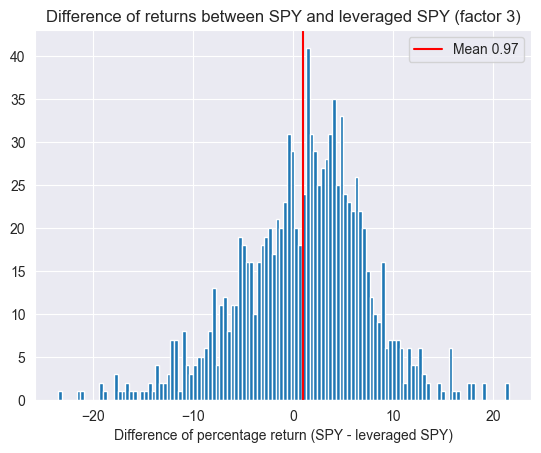

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

plt.figure()
plt.title(
    f"Difference of returns between {ticker} and leveraged {ticker} (factor {factor})"
)
plt.xlabel(f"Difference of percentage return ({ticker} - leveraged {ticker})")
mean = df["difference"].mean()
plt.axvline(x=mean, label=f"Mean {mean:.2f}", color="red")
plt.hist(df["difference"], bins=120)

plt.legend()
plt.show()

In [42]:
df["difference"].quantile(0.05)

np.float64(-10.665307254813968)

In [43]:
np.exp(np.sum(df["log_letf_factor"].iloc[start_idx + 1 : end_idx + 1]))

np.float64(1.017617655258862)

In [103]:
import pandas as pd


def compare_leveraged(series, window_size, factor):
    # df = yf.download(ticker, start_date, end_date)

    df = pd.DataFrame()
    df["returns"] = series.pct_change()

    df["ord_log_returns"] = np.log(1 + df["returns"])
    df["lev_log_returns"] = np.log(1 + df["returns"] * factor)

    # ordinary pct return ending on that day
    df["ord_pct_returns"] = 100 * series / series.shift(window_size)

    # ordinary_pct_change = 100*(df['Close'].iloc[end_idx]/df['Close'].iloc[start_idx])

    df["lev_pct_returns"] = 100 * np.exp(
        df["lev_log_returns"].rolling(window=window_size).sum()
    ).fillna(0)
    # df["lev_pct_returns"].fillna(0, inplace=True)

    difference = df["lev_pct_returns"] - df["ord_pct_returns"]
    difference.dropna(inplace=True)

    df.drop(
        columns=[
            "returns",
            "ord_log_returns",
            "lev_log_returns",
            "ord_pct_returns",
            "lev_pct_returns",
        ]
    )

    return difference

In [ ]:
def plot_comparison(series, window_sizes=[1, 5, 10, 21], factors=[2, 3, 5]):
    plt.figure()

    for window_size in window_sizes:
        for factor in factors:
            difference = compare_leveraged(data, window_size, factor)
            plt.hist(
                difference,
                bins=100,
                alpha=0.5,
                label=f"size = {window_size} \nfactor = {factor} \nmedian = {difference.median():.2f} \nmean = {difference.mean():.2f} \nstd = {difference.std():.2f}",
            )

    plt.xlabel(f"Difference of lETF - asset percentage returns")
    plt.legend()
    plt.show()

/tmp/ipykernel_8284/1831024621.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("F", start, end)["Close"]
[*********************100%***********************]  1 of 1 completed


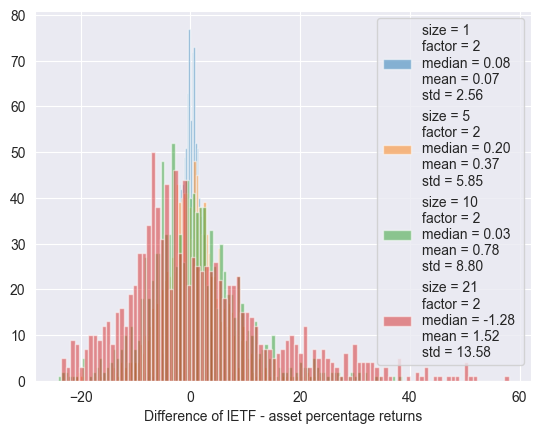

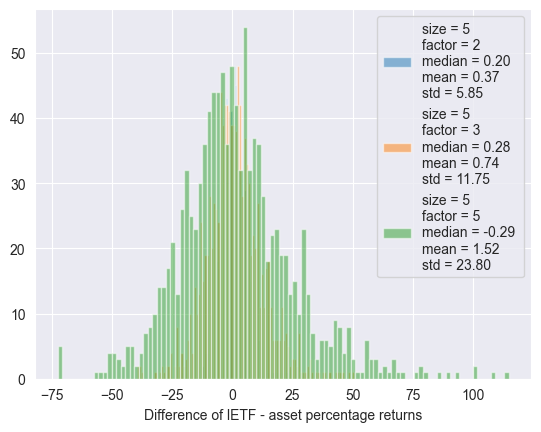

In [126]:
data = yf.download("F", start, end)["Close"]
plot_comparison(data, factors=[2])
plot_comparison(data, window_sizes=[5])

simulating movement GBM

In [84]:
import numpy as np

In [ ]:
def simulate_gbm(S0, mu, sigma, T, N, n_paths):
    # simulate n_paths many paths from 0 to T of GBM with parameters mu and sigma
    dt = T / N
    times = np.linspace(0, T, N + 1)

    Z = np.random.randn(n_paths, N)

    drift = mu - (1 / 2) * (sigma**2) * dt
    diffusion = sigma * dt * Z

    logS = np.zeros((n_paths, N + 1))
    logS[:, 0] = np.log(S0)
    logS[:, 1:] = np.cumsum(drift + diffusion, axis=1) + logS[:, :1]

    S = np.exp(logS)

    return S

In [ ]:
S = simulate_gbm(100, 0.01, 0.02, 10, 100, 100)

In [91]:
import pandas as pd

In [94]:
df = pd.DataFrame(S)

In [95]:
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,100.0,101.052128,102.386540,103.139004,104.238023,105.509953,106.786142,107.779487,108.819349,110.158454,...,251.833865,253.976300,257.321826,260.606751,263.629457,266.392384,269.673751,272.864762,275.306776,278.094615
1,100.0,100.858489,101.132101,102.045504,102.907436,103.621098,104.607083,105.625565,106.649916,107.756408,...,245.392569,248.141576,250.822772,253.381943,255.758368,258.093229,261.053374,263.581516,265.768556,268.508739
2,100.0,100.992713,102.026484,102.785158,103.634835,104.292525,105.249626,106.194559,107.063963,108.145334,...,247.051620,248.885621,251.657043,254.016080,255.903678,257.050202,259.695458,262.108548,264.054603,266.445130
3,100.0,101.143112,102.108015,103.198889,104.512350,105.754023,106.938966,108.314967,110.056388,110.909679,...,253.593194,255.984416,258.773483,261.669526,265.077718,267.520239,270.560734,273.852523,276.433237,278.598668
4,100.0,100.896286,101.710327,102.870181,104.138940,105.316189,106.385094,107.238334,108.483546,109.567969,...,247.233915,250.122543,252.959112,255.955442,259.299161,262.291394,264.939962,267.587108,270.252748,273.979610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,100.652266,101.933683,102.622038,103.643274,104.436878,105.610575,106.618959,107.807492,108.868620,...,243.523815,245.688159,248.865599,251.500632,253.708078,255.583192,258.036925,260.088024,262.714916,265.873591
96,100.0,100.946334,102.097771,103.004145,104.129580,104.924591,105.935196,106.943808,107.759856,108.935826,...,248.072286,250.420763,253.632329,256.095758,258.688588,261.757160,264.674883,268.025049,271.009716,273.446947
97,100.0,100.848458,102.053123,103.287198,104.121371,104.921469,105.886702,106.422733,107.418708,108.242266,...,239.365790,241.560379,243.936924,247.147535,249.527658,252.028929,255.159988,257.690935,259.929316,262.663815
98,100.0,100.609905,101.835549,102.954638,104.425177,105.375419,106.334674,107.068857,108.103225,109.285553,...,240.662711,242.773521,245.577816,248.414915,250.876810,253.596586,256.428868,258.375445,260.940818,263.786450


now do the below but with the above S

In [ ]:
# ordinary pct return ending on that day
df["ordinary_pct_return"] = 100 * df["Close"] / df["Close"].shift(window_length)

# ordinary_pct_change = 100*(df['Close'].iloc[end_idx]/df['Close'].iloc[start_idx])

df["leveraged_pct_change"] = 100 * np.exp(
    df["log_letf_factor"].rolling(window=window_length).sum()
)

# leveraged_pct_change = 100*(np.exp(np.sum(df['log_letf_factor'].iloc[start_idx + 1: end_idx + 1])))